# Lab4. Image corpus creation and binary classification using DNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

### Step-1: Dataset Creation

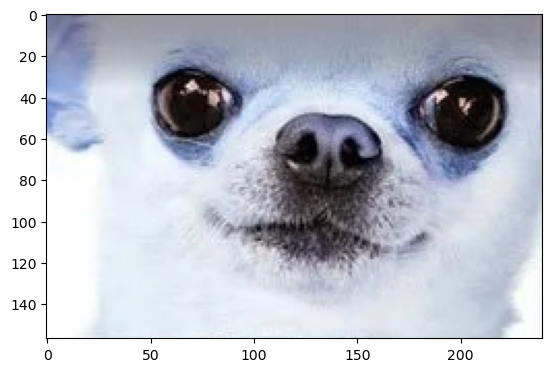

In [3]:
datadir ="D:\\notebooks\PDL LAB"
categories =['dogs']

for category in categories:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

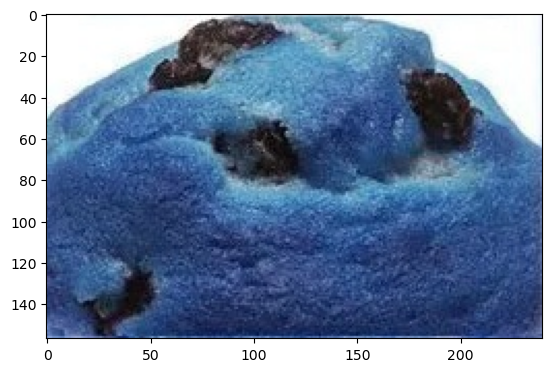

In [4]:
datadir ="D:\\notebooks\PDL LAB"
categories =['muffins']

for category in categories:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

### 2. Pre-processing

In [4]:
data = []


for category in categories:
    path = os.path.join(datadir, category)
    class_num = categories.index(category)
        
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        num_array = cv2.resize(img_array,(500, 500))
            
        data.append([num_array, class_num])

In [5]:
X = []
y = []

for features,label in data:
    X.append(features)
    y.append(label)

X = np.asarray(X).reshape(-1,500,500,1)
y = np.asarray(y)

### 3. Dataset Preparation

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 4. Model Creation

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(8, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(loss='mse',optimizer='RMSprop',metrics=['binary_accuracy'])
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.9978 - binary_accuracy: 2.4571e-05 - val_loss: 0.9987 - val_binary_accuracy: 2.6667e-06
Epoch 2/100
1/1 [==============================] - 0s 346ms/step - loss: 0.9977 - binary_accuracy: 2.4571e-05 - val_loss: 0.9987 - val_binary_accuracy: 2.6667e-06
Epoch 3/100
1/1 [==============================] - 0s 351ms/step - loss: 0.9977 - binary_accuracy: 2.4571e-05 - val_loss: 0.9987 - val_binary_accuracy: 2.6667e-06
Epoch 4/100
1/1 [==============================] - 0s 318ms/step - loss: 0.9977 - binary_accuracy: 2.4571e-05 - val_loss: 0.9986 - val_binary_accuracy: 2.6667e-06
Epoch 5/100
1/1 [==============================] - 0s 325ms/step - loss: 0.9976 - binary_accuracy: 2.4571e-05 - val_loss: 0.9986 - val_binary_accuracy: 2.6667e-06
Epoch 6/100
1/1 [==============================] - 0s 348ms/step - loss: 0.9976 - binary_accuracy: 2.4571e-05 - val_loss: 0.9986 - val_binary_accuracy: 2.6667e-06
Epoch 7/100
1/1 [========

1/1 [==============================] - 0s 338ms/step - loss: 0.9958 - binary_accuracy: 2.4571e-05 - val_loss: 0.9973 - val_binary_accuracy: 2.6667e-06
Epoch 52/100
1/1 [==============================] - 0s 336ms/step - loss: 0.9958 - binary_accuracy: 2.4571e-05 - val_loss: 0.9973 - val_binary_accuracy: 2.6667e-06
Epoch 53/100
1/1 [==============================] - 0s 320ms/step - loss: 0.9957 - binary_accuracy: 2.4571e-05 - val_loss: 0.9972 - val_binary_accuracy: 2.6667e-06
Epoch 54/100
1/1 [==============================] - 0s 331ms/step - loss: 0.9957 - binary_accuracy: 2.4571e-05 - val_loss: 0.9972 - val_binary_accuracy: 2.6667e-06
Epoch 55/100
1/1 [==============================] - 0s 314ms/step - loss: 0.9956 - binary_accuracy: 2.4571e-05 - val_loss: 0.9972 - val_binary_accuracy: 2.6667e-06
Epoch 56/100
1/1 [==============================] - 0s 315ms/step - loss: 0.9956 - binary_accuracy: 2.4571e-05 - val_loss: 0.9971 - val_binary_accuracy: 2.6667e-06
Epoch 57/100
1/1 [===========

In [9]:
model.evaluate(X_train,y_train)
print(model.summary())

1/1 [==============================] - 0s 161ms/step - loss: 0.9924 - binary_accuracy: 1.1029e-04
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 16        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### 4. Performance Analysis 

In [12]:
def training_data(heigth,width):
    data = []
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(heigth,width))
            data.append([num_array,class_num])
   
    X = []
    y = []
    for features,label in data:
        X.append(features)
        y.append(label)
    X = np.asarray(X).reshape(-1,heigth,width,1)
    y = np.asarray(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    return X_train, X_test, y_train, y_test


def model_train(model):
    model.compile(loss='mse',optimizer='RMSprop',metrics=['binary_accuracy'])
    model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1)
    return model.evaluate(X_test,y_test)

In [13]:
training_data(500,500)

model1 = Sequential()
model1.add(Dense(8, input_dim=1, activation='relu'))
model1.add(Dense(16,  activation='relu'))
model1.add(Dense(32,  activation='relu'))
model1.add(Dense(64,  activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(512, activation='relu'))
model1.add(Dense(1028,activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
    
model_train(model1)

1/1 [==============================] - 11s 11s/step - loss: 1.7196e-05 - binary_accuracy: 1.0000


[1.71963529282948e-05, 1.0]

In [14]:
training_data(100,100)

model2 = Sequential()
model2.add(Dense(8, input_dim=1, activation='relu'))
model2.add(Dense(16,  activation='relu'))
model2.add(Dense(32,  activation='relu'))
model2.add(Dense(64,  activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(1028,activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
    
model_train(model2)

1/1 [==============================] - 13s 13s/step - loss: 6.1008e-04 - binary_accuracy: 1.0000


[0.0006100849132053554, 1.0]

In [15]:
training_data(50,50)

model3 = Sequential()
model3.add(Dense(8, input_dim=1, activation='relu'))
model3.add(Dense(16,  activation='relu'))
model3.add(Dense(32,  activation='relu'))
model3.add(Dense(64,  activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(1028,activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
    
model_train(model3)

1/1 [==============================] - 12s 12s/step - loss: 3.1122e-05 - binary_accuracy: 1.0000


[3.112168997176923e-05, 1.0]

In [16]:
training_data(25,25)
model4 = Sequential()
model4.add(Dense(8, input_dim=1, activation='relu'))
model4.add(Dense(16,  activation='relu'))
model4.add(Dense(32,  activation='relu'))
model4.add(Dense(64,  activation='relu'))
model4.add(Dense(128, activation='relu'))
model4.add(Dense(256, activation='relu'))
model4.add(Dense(512, activation='relu'))
model4.add(Dense(1028,activation='relu'))
model4.add(Dense(1, activation='sigmoid'))
    
model_train(model4)

1/1 [==============================] - 17s 17s/step - loss: 0.0019 - binary_accuracy: 1.0000


[0.0019273854559287429, 1.0]

In [17]:
training_data(10,10)

model5 = Sequential()
model5.add(Dense(8, input_dim=1, activation='relu'))
model5.add(Dense(16,  activation='relu'))
model5.add(Dense(32,  activation='relu'))
model5.add(Dense(64,  activation='relu'))
model5.add(Dense(128, activation='relu'))
model5.add(Dense(256, activation='relu'))
model5.add(Dense(512, activation='relu'))
model5.add(Dense(1028,activation='relu'))
model5.add(Dense(1, activation='sigmoid'))
    
model_train(model5)

1/1 [==============================] - 12s 12s/step - loss: 5.7587e-05 - binary_accuracy: 1.0000


[5.758739644079469e-05, 1.0]

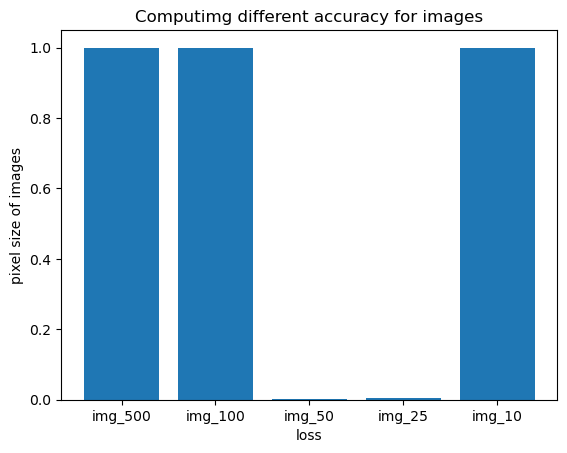

In [27]:
bar={'img_500':1.0,'img_100':1.0,'img_50':0.0027,'img_25':0.0031,'img_10':1.0}
courses = list(bar.keys())
values = list(bar.values())

plt.bar(courses, values)

plt.xlabel("loss")
plt.ylabel("pixel size of images")
plt.title("Computimg different accuracy for images")
plt.show()

### b.Different neural network

In [19]:
model2l =Sequential()
model2l.add(Dense(32,input_dim=1,activation='relu'))
model2l.add(Dense(32,input_dim=1,activation='relu'))
model2l.add(Dense(1,activation='sigmoid'))

model_train(model2l)

1/1 [==============================] - 0s 159ms/step - loss: 0.0259 - binary_accuracy: 1.0000


[0.025924989953637123, 1.0]

In [21]:
model3l =Sequential()
model3l.add(Dense(32,input_dim=1,activation='relu'))
model3l.add(Dense(32,input_dim=1,activation='relu'))
model3l.add(Dense(32,input_dim=1,activation='relu'))
model3l.add(Dense(1,activation='sigmoid'))

model_train(model3l)

1/1 [==============================] - 0s 202ms/step - loss: 4.8188e-04 - binary_accuracy: 1.0000


[0.00048188105574809015, 1.0]

In [23]:
model4l =Sequential()
model4l.add(Dense(32,input_dim=1,activation='relu'))
model4l.add(Dense(32,input_dim=1,activation='relu'))
model4l.add(Dense(32,input_dim=1,activation='relu'))
model4l.add(Dense(32,input_dim=1,activation='relu'))
model4l.add(Dense(1,activation='sigmoid'))

model_train(model4l)

1/1 [==============================] - 0s 252ms/step - loss: 0.9380 - binary_accuracy: 2.6667e-06


[0.9379870295524597, 2.6666666599339806e-06]

In [24]:
model5l =Sequential()
model5l.add(Dense(32,input_dim=1,activation='relu'))
model5l.add(Dense(32,input_dim=1,activation='relu'))
model5l.add(Dense(32,input_dim=1,activation='relu'))
model5l.add(Dense(32,input_dim=1,activation='relu'))
model5l.add(Dense(32,input_dim=1,activation='relu'))
model5l.add(Dense(1,activation='sigmoid'))

model_train(model5l)

1/1 [==============================] - 0s 294ms/step - loss: 0.0100 - binary_accuracy: 1.0000


[0.01001710258424282, 1.0]

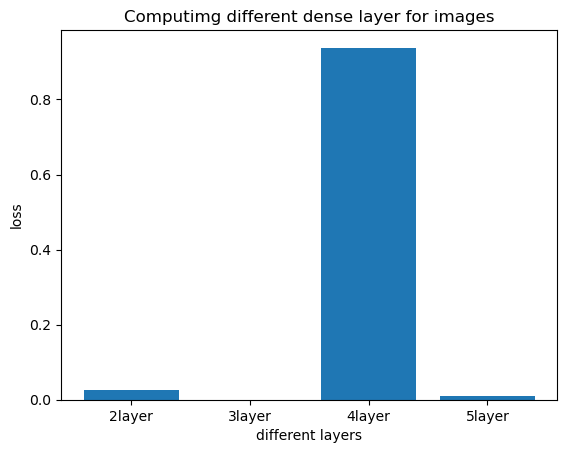

In [26]:
# creating the barset
bar={'2layer':0.025924,'3layer':0.00043,'4layer':0.9379,'5layer':0.01001}
courses = list(bar.keys())
values = list(bar.values())
# creating the bar plot
plt.bar(courses, values)

plt.xlabel("different layers")
plt.ylabel("loss")
plt.title("Computimg different dense layer for images")
plt.show()